# Visulization of the training and inference results

In [4]:
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from param import *

sns.set_theme(style="whitegrid", palette=sns.diverging_palette(12,30, s=100, l=50, sep=1,  n=7, center="dark"))
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

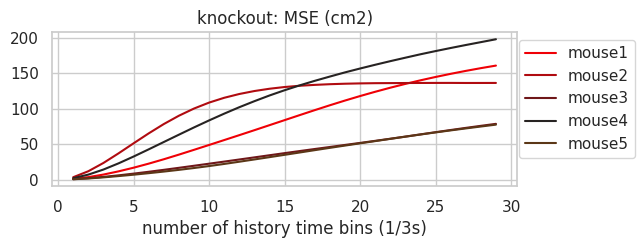

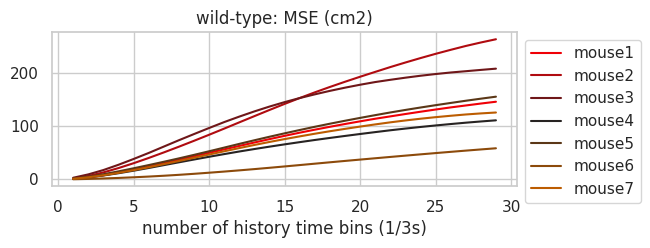

In [7]:
ko_mse_list = []
wt_mse_list = []
ko_id, wt_id= 0, 0
fig1, ax1 = plt.subplots(figsize=(6,2))
fig2, ax2 = plt.subplots(figsize=(6,2))
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    if mouse_type == "knockout":
        ko_id +=1
        with open(output_dir/(f"rr_only_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        xx, yy = [], []
        for result in eval_results_all:
            if (result["coord_axis"] == "x-axis"):
                yy.append(result["eval_test_scores"]/25)
                xx.append(result["nthist"])
        ax1.plot(xx, yy, label=f"mouse{ko_id}")
        ax1.set_title(f"{mouse_type}: MSE (cm2)")
        ax1.set_xlabel("number of history time bins (1/3s)")
        ax1.legend(bbox_to_anchor=(1.27, 1))

    if mouse_type == "wild-type":
        wt_id +=1
        with open(output_dir/(f"rr_only_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        xx, yy = [], []
        for result in eval_results_all:
            if (result["coord_axis"] == "x-axis"):
                yy.append(result["eval_test_scores"]/25)
                xx.append(result["nthist"])
        ax2.plot(xx, yy, label=f"mouse{wt_id}")
        ax2.set_title(f"{mouse_type}: MSE (cm2)")
        ax2.set_xlabel("number of history time bins (1/3s)")
        ax2.legend(bbox_to_anchor=(1, 1))    